In [1]:
%matplotlib inline

import librosa
import librosa.display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd


In [2]:
y, sr = librosa.load("../dataset/exp/Aegolius harrisii/song/10001.mp3")
print("Sample Rate: {}".format(sr))

Sample Rate: 22050


In [3]:
ipd.Audio(y, rate = sr)

# RMS

Energia RMS para cada frame $i$ de tamanho $N$:

$RMS(i) = \frac{1}{N}\sum\limits_{k=0}^{N} x[N*i+k]^2$

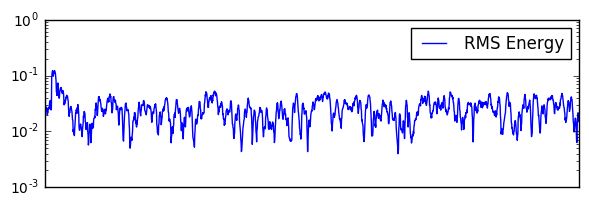

In [73]:
rms = librosa.feature.rmse(y = y)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.tight_layout()

# MFCC

$MFCC_i = \sum\limits_{k=1}^{K} X_k cos[i(k-\frac{1}{2})\frac{\pi}{k}]$

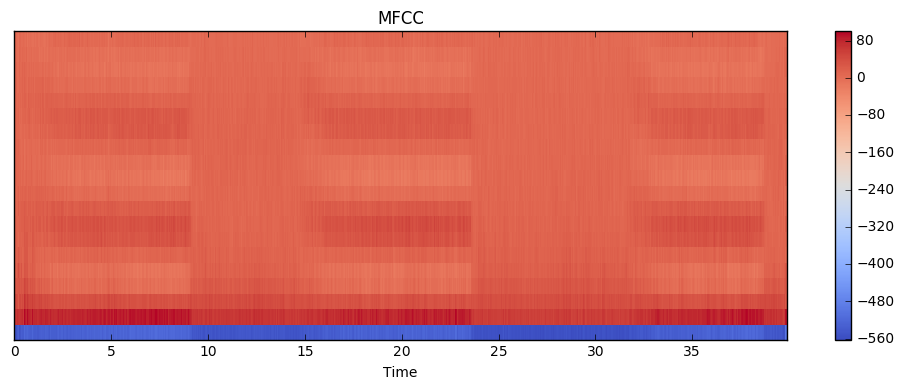

In [74]:
mfccs = librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 20)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

# Spectral Centroid


1. Normalize o spectrograma de magnitude
2. Extraia a média (centróide) de cada frame

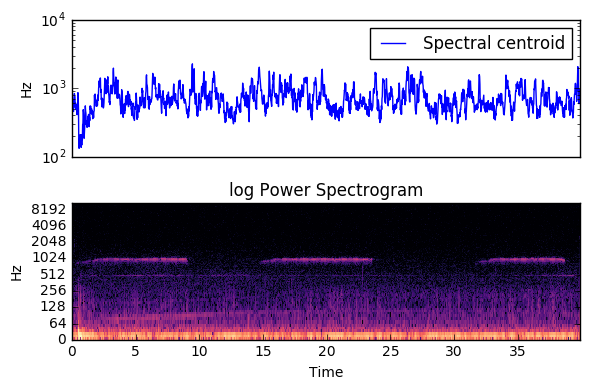

In [62]:
S, phase = librosa.magphase(librosa.stft(y = y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref = np.max), y_axis = 'log', x_axis = 'time')
plt.title('log Power Spectrogram')
plt.tight_layout()

# Spectral Bandwidth

Spectral bandwidth de p-ésima ordem:
$
\begin{align}
\bigg[\sum\limits_{k} S[k]*(freq[k] - centroid)^p\bigg]^{1/p}
\end{align}
$
onde $freq$ são as frequências centrais dos bins do espectrograma. 

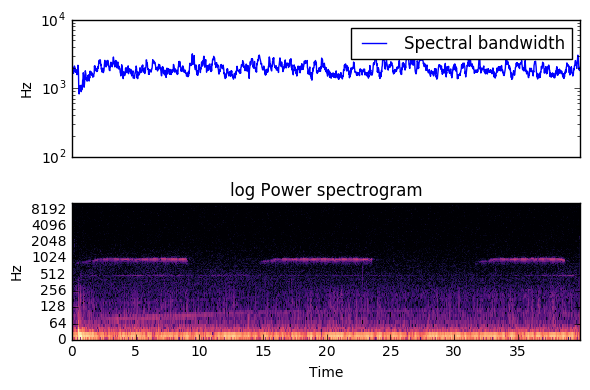

In [64]:
cent
f = librosa.fft_frequencies(sr = sr, n_fft = 2048)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(spec_bw.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bw.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis = 'log', x_axis = 'time')
plt.title('log Power spectrogram')
plt.tight_layout()


# Spectral Rolloff

The spectral rolloff point is the fraction of bins in the power spectrum at which 85% of the power is at lower frequencies.

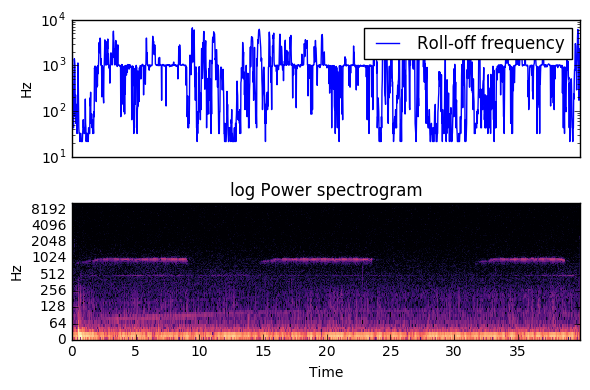

In [67]:
rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(rolloff.T, label = 'Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis = 'log', x_axis = 'time')
plt.title('log Power spectrogram')
plt.tight_layout()

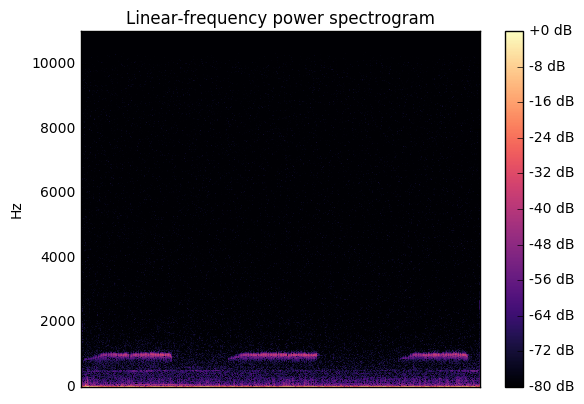

In [4]:
D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.title('Linear-frequency power spectrogram')

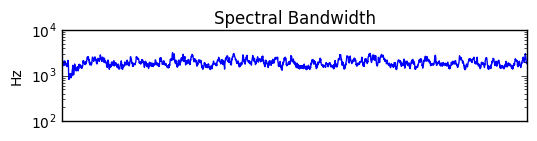

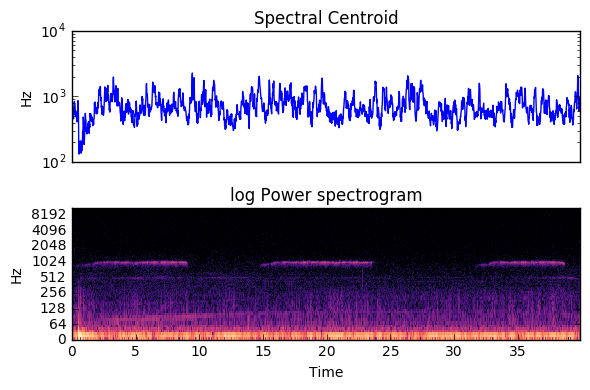

In [6]:
S, phase = librosa.magphase(librosa.stft(y = y))
cent = librosa.feature.spectral_centroid(y = y, sr = sr)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)

plt.subplot(3, 1, 1)
plt.semilogy(spec_bw.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bw.shape[-1]])
plt.title('Spectral Bandwidth')
#plt.legend()

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.title('Spectral Centroid')
#plt.legend()

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()


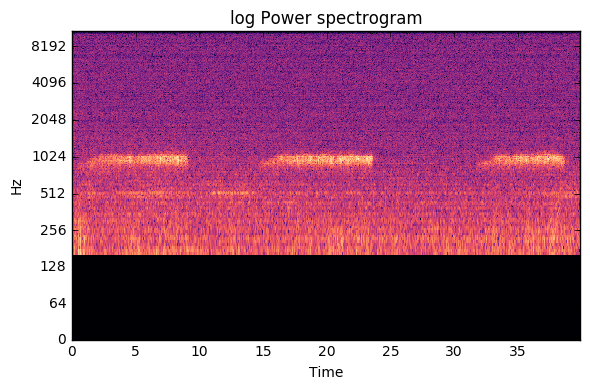

In [27]:
S, phase = librosa.magphase(librosa.stft(y = y))

S[:15,:] = 0
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()

y = librosa.core.istft(S)


In [28]:
ipd.Audio(y, rate = sr)

mfccs len: (20, 1718)


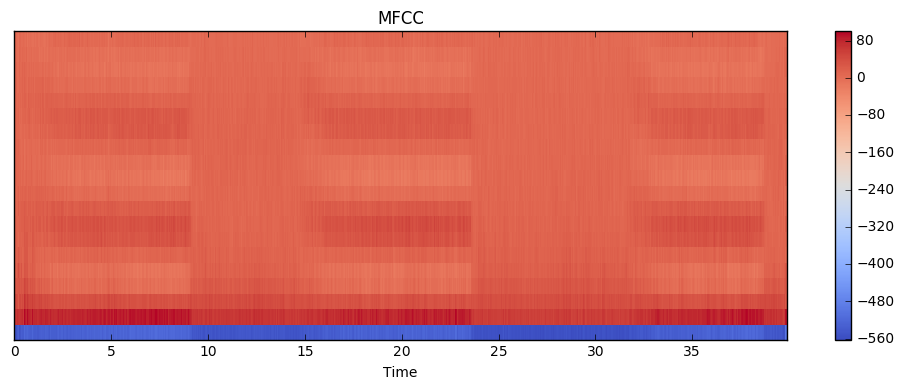

In [4]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print("mfccs len: {}".format(mfccs.shape))

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [5]:
def load_and_show_spec(file_path):
    y, sr = librosa.load(file_path)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.title('Linear-frequency power spectrogram')
    return D

def load_and_show_melspec(file_path, nmels = 128):
    y, sr = librosa.load(file_path)
    D = librosa.feature.melspectrogram(y = y, sr = sr, n_mels = nmels)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(D,ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    return D
    
def load_and_show_mfcc(file_path):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    print("mfccs len: {}".format(mfccs.shape))
    print("mfccs mean: {} | std: {} | min: {} | max: {}".format(np.mean(mfccs), np.std(mfccs), np.min(mfccs), np.max(mfccs)))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    return mfccs


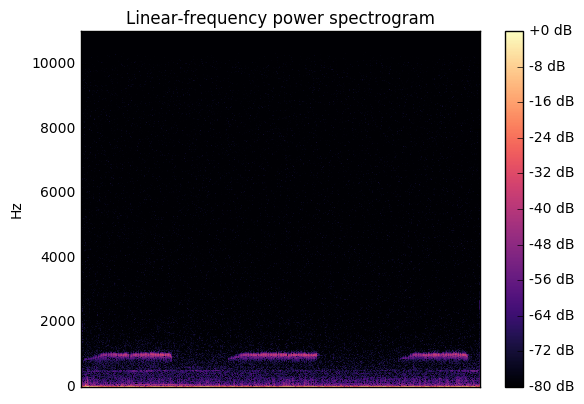

In [7]:
D = load_and_show_spec("../dataset/exp/Aegolius harrisii/song/10001.mp3")

array([[  5.92233815e-01,   4.24857678e+00,   7.16750005e+00, ...,
          8.50532015e+00,   5.73378935e+00,   7.55429398e-01],
       [  1.67606638e-01,   1.74811013e-01,   5.36843788e-02, ...,
          1.08522094e-01,   4.18309805e-01,   2.20410179e-01],
       [  3.04553351e-02,   1.99933608e-02,   4.70798505e-03, ...,
          1.25052637e-02,   8.70333030e-02,   5.32346203e-02],
       ..., 
       [  3.81578443e-06,   3.70688804e-06,   3.89072471e-06, ...,
          3.28384782e-06,   2.73816089e-06,   6.15349400e-07],
       [  3.33762738e-07,   6.57561804e-07,   1.19416114e-06, ...,
          1.07500631e-06,   1.23350177e-06,   3.55058011e-07],
       [  1.77604165e-08,   5.94334456e-08,   1.03411602e-07, ...,
          5.72148626e-08,   8.17317651e-08,   3.01299036e-08]])

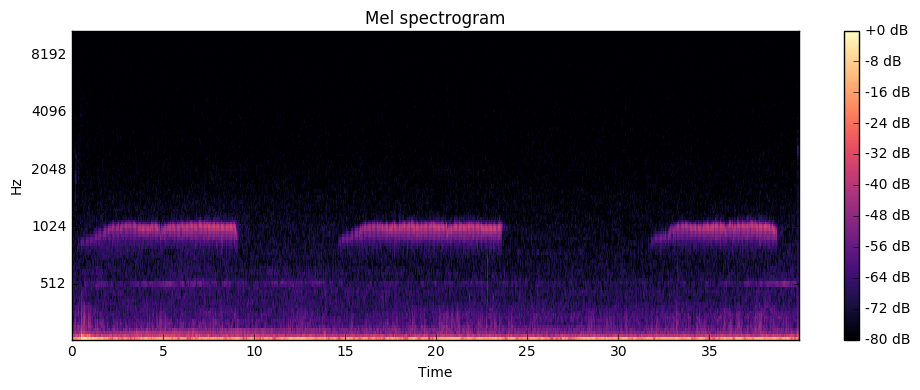

In [6]:
load_and_show_melspec("../dataset/exp/Aegolius harrisii/song/10001.mp3")

mfccs len: (20, 1718)
mfccs mean: -12.317859834156598 | std: 121.936374704148 | min: -562.1270730679703 | max: 101.24849958974393


array([[ -4.75279049e+02,  -4.81894505e+02,  -5.38459482e+02, ...,
         -5.37241007e+02,  -4.94922519e+02,  -5.06911389e+02],
       [  9.03083899e+01,   8.17663626e+01,   6.31641198e+01, ...,
          6.90526467e+01,   9.17347020e+01,   9.07827004e+01],
       [  1.13182619e+01,   1.37887708e+01,   3.67394969e+01, ...,
          3.96334242e+01,   2.76626298e+01,   3.04632144e+01],
       ..., 
       [  6.24308731e+00,   8.32797464e+00,   8.45631486e+00, ...,
          1.02814872e+01,   1.06496457e+01,   9.63149828e+00],
       [  6.48167203e+00,   7.04674065e+00,   8.38223946e+00, ...,
          6.47230895e+00,   1.05453834e+01,   8.62005928e+00],
       [  3.61630772e-01,   1.37788942e+00,   6.47185690e+00, ...,
          1.61523421e-01,   3.31702099e+00,   3.64490028e+00]])

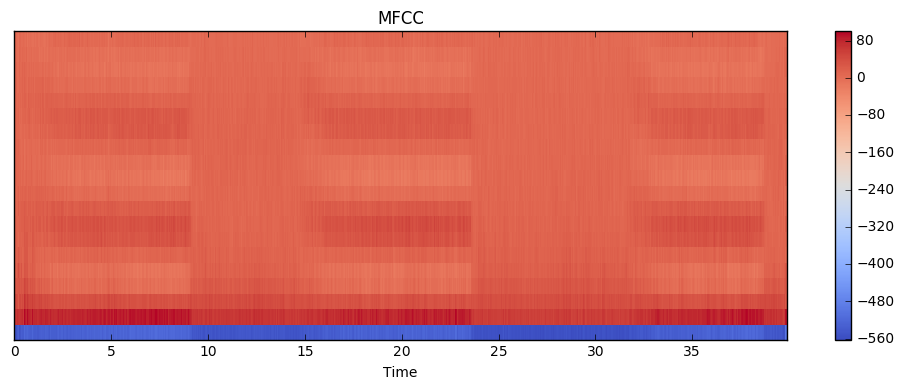

In [8]:
load_and_show_mfcc("../dataset/exp/Aegolius harrisii/song/10001.mp3")

In [ ]:
load_and_show_spec("../dataset/exp/Aegolius harrisii/song/10002.mp3")

mfccs len: (20, 2215)
mfccs mean: -24.768939322679692 | std: 128.2339728526244 | min: -611.7307213541701 | max: 91.46952219393629


array([[ -6.11730721e+02,  -6.11730721e+02,  -6.11321520e+02, ...,
         -6.08494812e+02,  -6.09240361e+02,  -6.11730721e+02],
       [ -5.77315973e-14,  -5.77315973e-14,   5.78654501e-01, ...,
          4.57490655e+00,   3.52078299e+00,  -5.77315973e-14],
       [  5.15143483e-14,   5.15143483e-14,   5.78523782e-01, ...,
          4.57082502e+00,   3.51742948e+00,   5.15143483e-14],
       ..., 
       [ -6.21724894e-14,  -6.21724894e-14,   5.66150380e-01, ...,
          4.19376629e+00,   3.20874845e+00,  -6.21724894e-14],
       [ -8.88178420e-16,  -8.88178420e-16,   5.64636945e-01, ...,
          4.14889818e+00,   3.17216654e+00,  -8.88178420e-16],
       [  4.26325641e-14,   4.26325641e-14,   5.63038478e-01, ...,
          4.10180263e+00,   3.13380324e+00,   4.26325641e-14]])

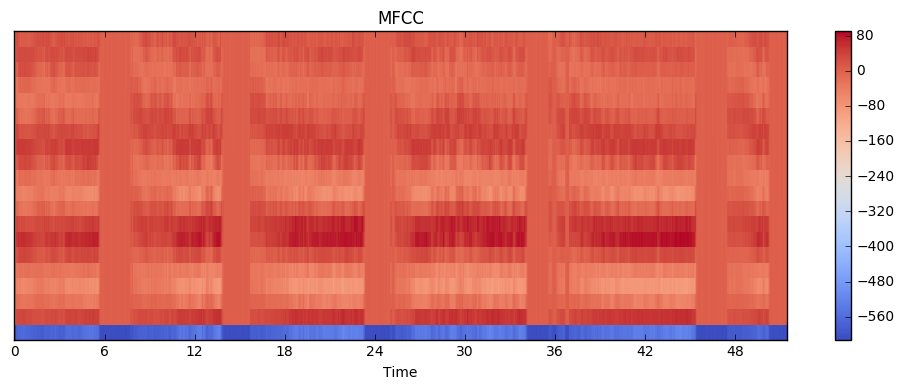

In [9]:
load_and_show_mfcc("../dataset/exp/Aegolius harrisii/song/10002.mp3")

In [ ]:
load_and_show_spec("../dataset/exp/Brotogeris tirica/song/1000130.mp3")

mfccs len: (20, 2434)
mfccs mean: -10.600584217093267 | std: 88.61504105216447 | min: -630.6110906149153 | max: 160.13321168337586


array([[ -5.18498045e+02,  -4.62252568e+02,  -4.35612267e+02, ...,
         -4.52998805e+02,  -5.27211250e+02,  -6.30611091e+02],
       [  9.50281955e+01,   8.97506152e+01,   8.00865606e+01, ...,
          9.43328508e+01,   8.48956243e+01,   1.14947248e+01],
       [  3.85426001e+01,   1.79239368e+01,   5.20802122e+00, ...,
          2.21279290e+01,   3.62776776e+01,   1.13490554e+01],
       ..., 
       [  3.10378858e+00,   1.48914454e+00,  -5.19317610e-02, ...,
          3.32348146e+00,   6.90757716e+00,   2.35615958e+00],
       [  1.84957863e+00,  -8.58772200e-01,  -1.66112823e+00, ...,
          3.73082065e+00,   2.58434527e+00,   1.75730513e+00],
       [  1.28810826e+00,   1.14893083e+00,   7.01089130e-01, ...,
          6.18986137e-03,  -2.96712512e+00,   1.21042998e+00]])

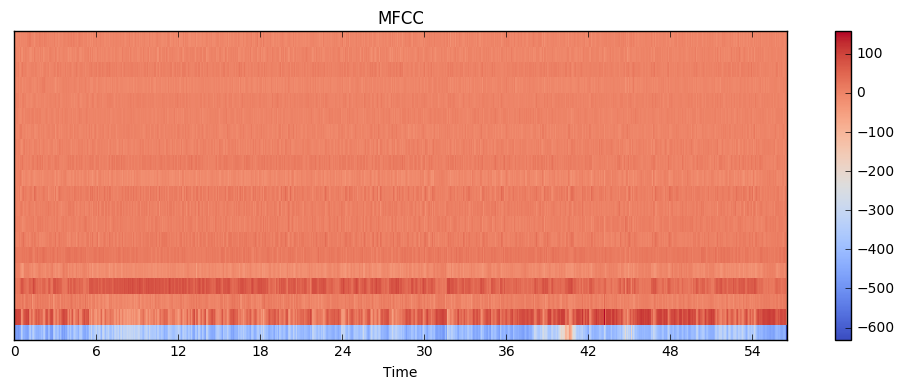

In [10]:
load_and_show_mfcc("../dataset/exp/Brotogeris tirica/song/1000130.mp3")